
# Regressão Linear, Ridge e Lasso


Realiza uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso no Boston Housing Dataset.

Baseado no livro: Andreas C. Müller, Sarah Guido (2016)
*Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition*.

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Boston Housing dataset

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

506 registros

14 atributos



In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt


california = fetch_california_housing()
X = california.data
print("Numero de atributos original:")
print(X.shape)

# O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

X = MinMaxScaler().fit_transform(california.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (atributos redundantes):")
print(X.shape)
y = california.target



Numero de atributos original:
(20640, 8)
Polynomial Features (atributos redundantes):
(20640, 44)


### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R^2 de predição.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Rˆ2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))

##lembrando que a linha horizontal na média tem um Rˆ2 de 0.0

Regressão Linear (com atributos redundantes)
Rˆ2 na base de treinamento: 0.69
Rˆ2 na base de teste: -0.73


### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.


In [10]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Rˆ2 na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f} \n".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Rˆ2 na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f} \n".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Rˆ2 na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))



Ridge alpha=1
Rˆ2 na base de treinamento: 0.63
Rˆ2 na base de teste: 0.61 

Ridge alpha=10
Rˆ2 na base de treinamento: 0.61
Rˆ2 na base de teste: 0.59 

Ridge alpha=0.1
Rˆ2 na base de treinamento: 0.65
Rˆ2 na base de teste: 0.63


### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

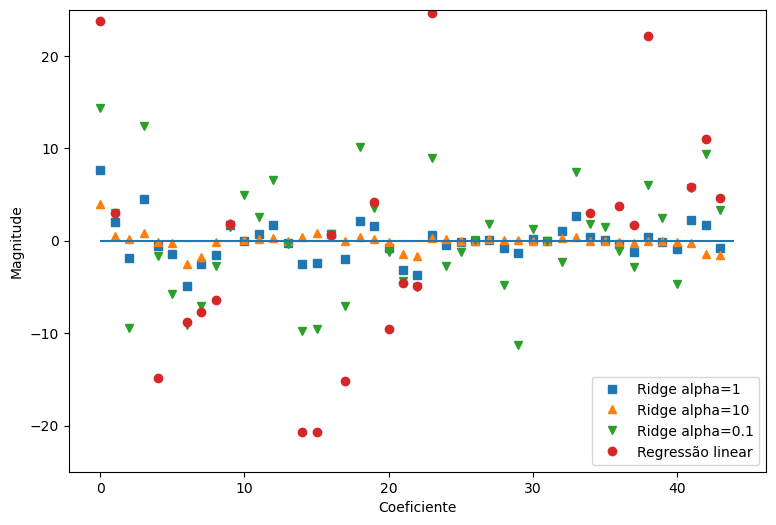

In [11]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.


In [14]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Rˆ2 na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {} \n".format(np.sum(lasso.coef_ != 0)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Rˆ2 na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}\n".format(np.sum(lasso001.coef_ != 0)))


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.0001")
print("Rˆ2 na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Rˆ2 na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))



Lasso alpha=1
Rˆ2 na base de treinamento: 0.00
Rˆ2 na base de teste: -0.00
Número de atributos usados: 0 

Lasso alpha=.01
Rˆ2 na base de treinamento: 0.56
Rˆ2 na base de teste: 0.53
Número de atributos usados: 4

Lasso alpha=.0001
Rˆ2 na base de treinamento: 0.64
Rˆ2 na base de teste: 0.62
Número de atributos usados: 19


### Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

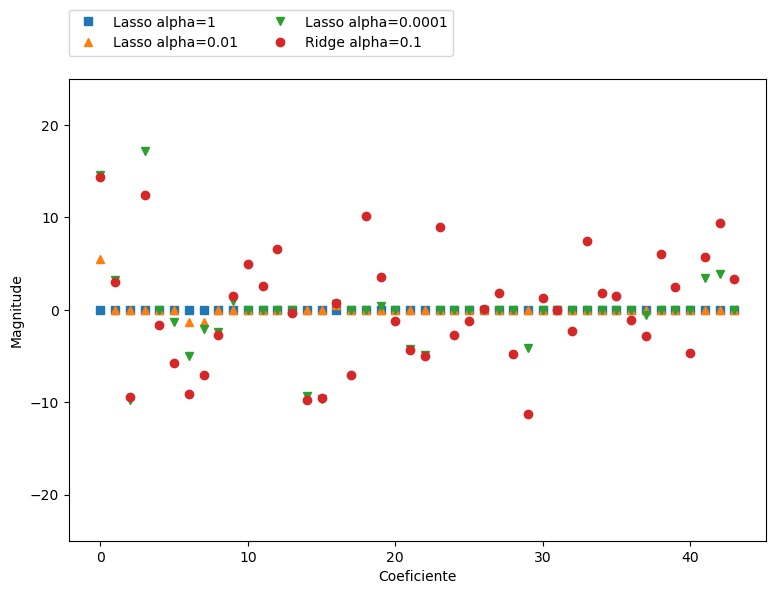

In [15]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
